In [17]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as torch
import torch
import torch.optim as optim
import matplotlib.pyplot as plt


In [3]:
train_data = datasets.MNIST(

    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(

    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)



In [4]:



loaders = {

    'train' : DataLoader(train_data,
                         batch_size=100,
                         shuffle=True,
                         num_workers=1,),
    
    'test' : DataLoader(test_data,
                         batch_size=100,
                         shuffle=True,
                         num_workers=1,),

                         
}

In [5]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7c7e139a2710>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7c7eb2fdf390>}

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(20 * 4 * 4, 50)
        self.fc2 = nn.Linear(50, 10)
    
    
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 20 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x 



In [7]:


device = torch.device('cuda' if
                       torch.cuda.is_available() else 'cpu')


model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.001)

loss_fn = nn.CrossEntropyLoss()


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)  # Move data to device
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f} ')


def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(loaders['test'].dataset)
    
    print(f'\nTest set; Average loss:  {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100.* correct / len(loaders["test"].dataset):.0f}%\n   ')

In [48]:
for epoch in range(1, 11):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	0.070907 
Train Epoch: 1 [2000/60000 (3%)]	0.256345 
Train Epoch: 1 [4000/60000 (7%)]	0.100794 
Train Epoch: 1 [6000/60000 (10%)]	0.047715 
Train Epoch: 1 [8000/60000 (13%)]	0.054792 
Train Epoch: 1 [10000/60000 (17%)]	0.089662 
Train Epoch: 1 [12000/60000 (20%)]	0.206480 
Train Epoch: 1 [14000/60000 (23%)]	0.104272 
Train Epoch: 1 [16000/60000 (27%)]	0.140707 
Train Epoch: 1 [18000/60000 (30%)]	0.131269 
Train Epoch: 1 [20000/60000 (33%)]	0.176034 
Train Epoch: 1 [22000/60000 (37%)]	0.207430 
Train Epoch: 1 [24000/60000 (40%)]	0.181787 
Train Epoch: 1 [26000/60000 (43%)]	0.125850 
Train Epoch: 1 [28000/60000 (47%)]	0.123901 
Train Epoch: 1 [30000/60000 (50%)]	0.092910 
Train Epoch: 1 [32000/60000 (53%)]	0.178220 
Train Epoch: 1 [34000/60000 (57%)]	0.060067 
Train Epoch: 1 [36000/60000 (60%)]	0.112233 
Train Epoch: 1 [38000/60000 (63%)]	0.187536 
Train Epoch: 1 [40000/60000 (67%)]	0.147290 
Train Epoch: 1 [42000/60000 (70%)]	0.280558 
Train Epoch: 1 [44000

In [9]:
device


device(type='cuda')

Expected Number: 5
Predicted Number: 5


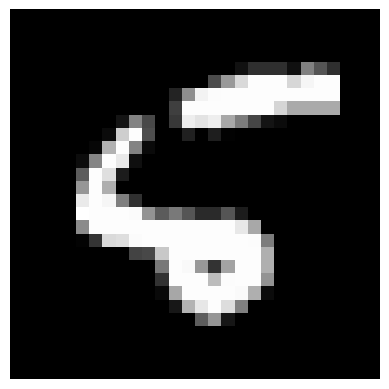

In [47]:
model.eval()

data, target = test_data[8]  
data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Expected Number: {target}')
print(f'Predicted Number: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()